In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

df = pd.read_csv (r'diabetes (2).csv')
print (df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [133]:
df=df.drop(columns=['SkinThickness', 'DiabetesPedigreeFunction'])

In [134]:
df.describe()

Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      3.845052  120.894531      69.105469   79.799479   31.992578   
std       3.369578   31.972618      19.355807  115.244002    7.884160   
min       0.000000    0.000000       0.000000    0.000000    0.000000   
25%       1.000000   99.000000      62.000000    0.000000   27.300000   
50%       3.000000  117.000000      72.000000   30.500000   32.000000   
75%       6.000000  140.250000      80.000000  127.250000   36.600000   
max      17.000000  199.000000     122.000000  846.000000   67.100000   

              Age     Outcome  
count  768.000000  768.000000  
mean    33.240885    0.348958  
std     11.760232    0.476951  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000000    1.000000

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


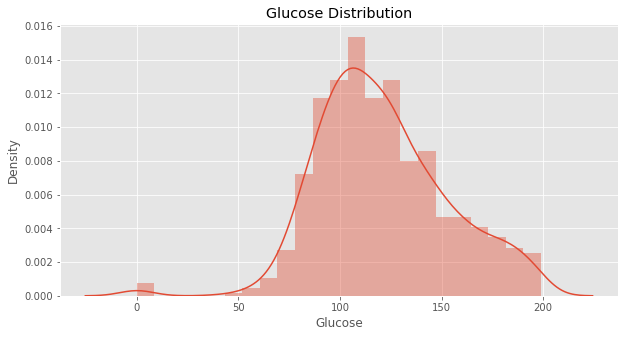

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Glucose Distribution')
sns.distplot(df['Glucose'])
plt.show()

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


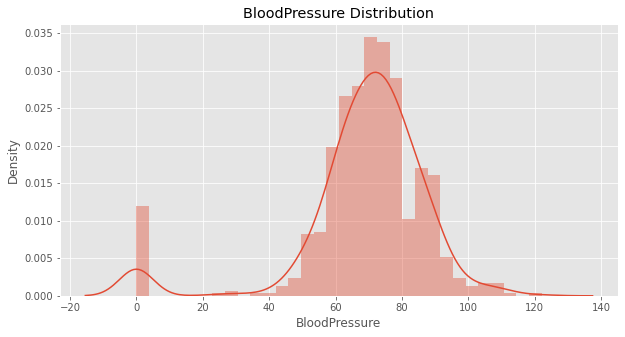

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BloodPressure Distribution')
sns.distplot(df['BloodPressure'])
plt.show()

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


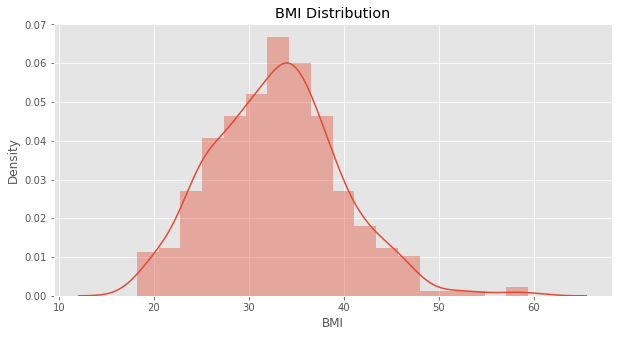

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution')
sns.distplot(df['BMI'])
plt.show()

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


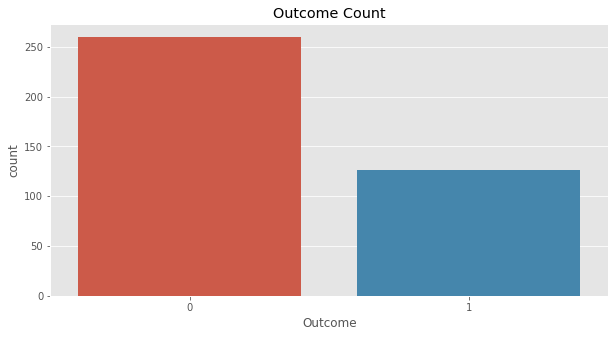

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Outcome'])
plt.title('Outcome Count')
plt.show()

In [ ]:
colors = ['pink', 'blue']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

In [45]:
corr = df.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.511047
Age                         0.345434
Insulin                     0.295405
Pregnancies                 0.261674
BMI                         0.252578
DiabetesPedigreeFunction    0.212884
BloodPressure               0.184589
Name: Outcome, dtype: float64

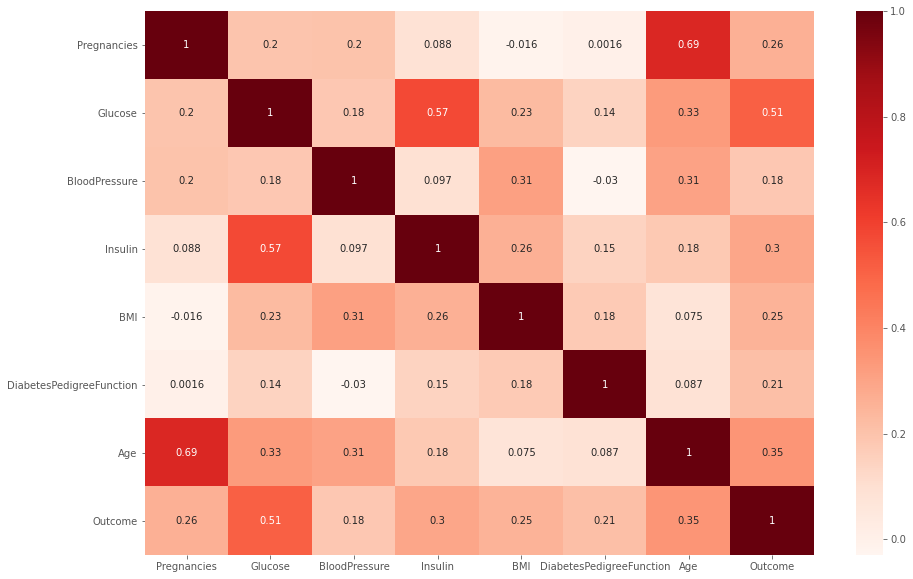

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

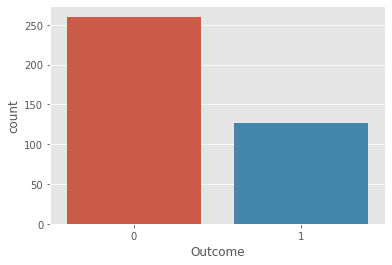

In [129]:
sns.countplot(x="Outcome", data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

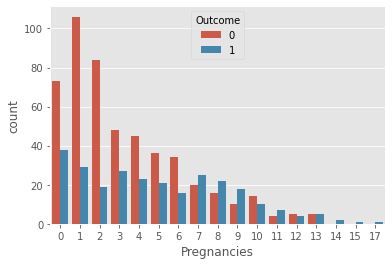

In [141]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=df)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

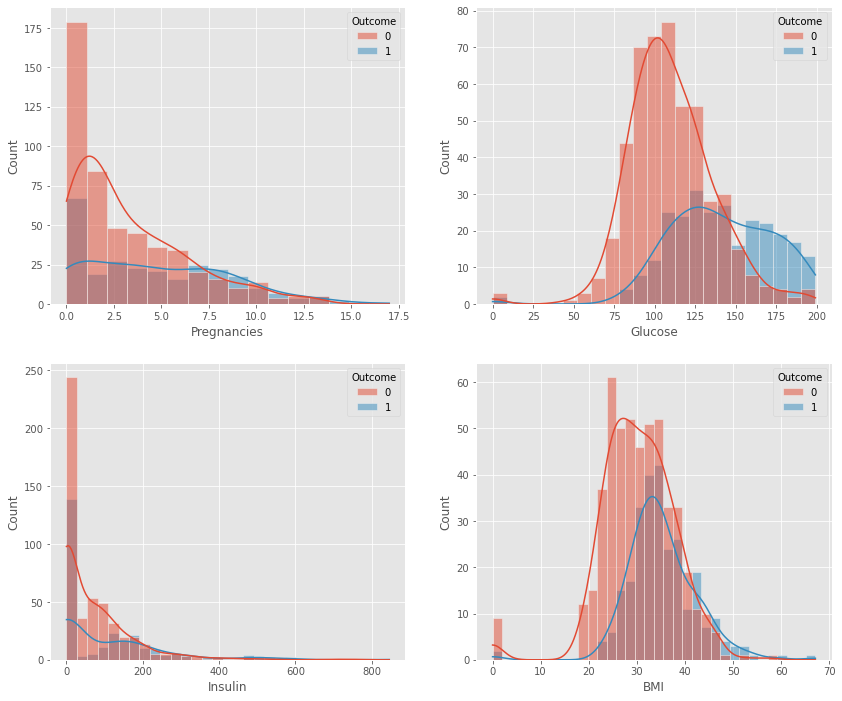

In [155]:
fig, ax = plt.subplots(2,2, figsize=(14,12))
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True,ax=ax[0,0])
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True,ax=ax[0,1]) 
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True,ax=ax[1,0]) 
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True,ax=ax[1,1])

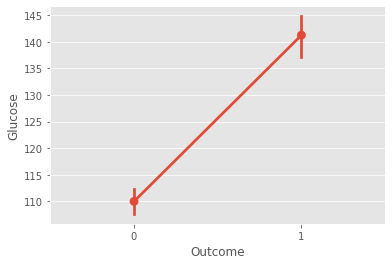

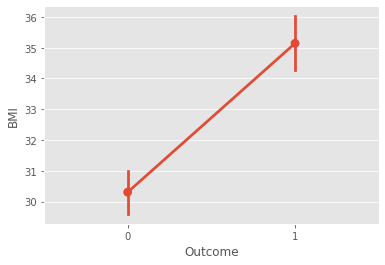

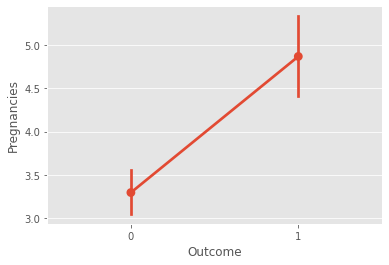

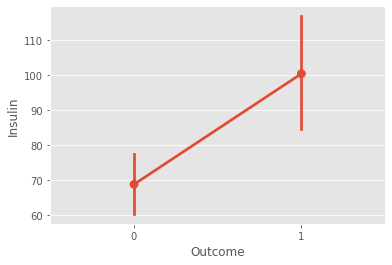

In [145]:
for i in ['Glucose','BMI', 'Pregnancies','Insulin']:
    sns.pointplot(x='Outcome', y= i, data=df) 
    plt.show()

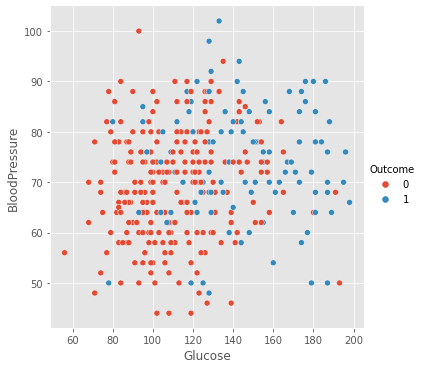

In [56]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

sns.relplot(x = "Glucose", y = "BloodPressure", hue = "Outcome", data = df_new)

Text(0, 0.5, 'Observations')

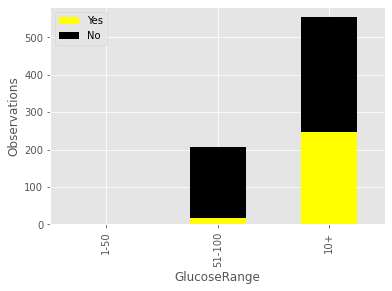

In [169]:
df['GlucoseRange']=pd.cut(df.Glucose,bins=[0,50,100,200],labels=['1-50','51-100','10+'])
total=df.groupby('GlucoseRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('GlucoseRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.GlucoseRange
total.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red'])
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

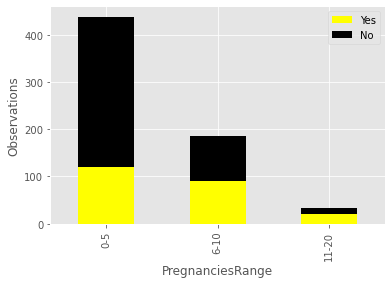

In [170]:
df['PregnanciesRange']=pd.cut(df.Pregnancies,bins=[0,5,10,20],labels=['0-5','6-10','11-20'])
total=df.groupby('PregnanciesRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('PregnanciesRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.PregnanciesRange
total.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red'])
plt.ylabel('Observations')

In [174]:
stats.f_oneway(df['Outcome'][df['PregnanciesRange'] == '0-5'],
               df['Outcome'][df['PregnanciesRange'] == '6-10'],
               df['Outcome'][df['PregnanciesRange'] == '11-20'])

F_onewayResult(statistic=19.32319190384053, pvalue=7.0248964225472404e-09)

Text(0, 0.5, 'Observations')

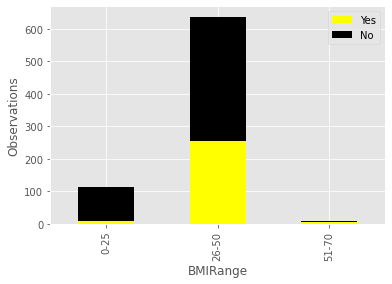

In [171]:
df['BMIRange']=pd.cut(df.BMI,bins=[0,25,50,70],labels=['0-25','26-50','51-70'])
total=df.groupby('BMIRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('BMIRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.BMIRange
total.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red'])
plt.ylabel('Observations')

In [166]:
y=df['Outcome']
X=df[['Pregnancies','Glucose','Insulin','BMI']]

In [85]:
ols = sm.OLS(y,X).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.463
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                              82.21
Date:                Mon, 28 Mar 2022   Prob (F-statistic):                    2.74e-50
Time:                        17:11:14   Log-Likelihood:                         -211.78
No. Observations:                 386   AIC:                                      431.6
Df Residuals:                     382   BIC:                                      447.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [105]:
model=ols(formula='Outcome~Pregnancies+Age+BloodPressure+Insulin+BMI+DiabetesPedigreeFunction+C(GlucoseRange)',data=df)


In [106]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     18.59
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.78e-21
Time:                        17:32:54   Log-Likelihood:                -197.89
No. Observations:                 385   AIC:                             411.8
Df Residuals:                     377   BIC:                             443.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.4085      0.102     -4.013      0.000      -0.609      -0.208
C(GlucoseRange)[T.51-100]    -0.3043      0.053     -5.698      0.000      -0.409      -0.199
C(GlucoseRange)[T.10+]       -0.1041      0.060     -1.722      0.086      -0.223       0.015
Pregnancies                   0.0136      0.009      1.504      0.133      -0.004       0.031
Age                           0.0087      0.003      2.904      0.004       0.003       0.015
BloodPressure                 0.0012      0.002      0.580      0.562      -0.003       0.005
Insulin                       0.0004      0.000      2.069      0.039    2.15e-05       0.001
BMI                           0.0101      0.003      2.933      0.004       0.003       0.017
DiabetesPedigreeFunction      0.1958      0.062      3.161      0.002       0.074       0.318
==============================================================================
Omnibus:                       38.675   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.958
Skew:                           0.336   Prob(JB):                     0.000126
Kurtosis:                       2.183   Cond. No.                     9.06e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [172]:
model=ols(formula='Outcome~BloodPressure+C(GlucoseRange)+C(BMIRange)+Insulin+C(PregnanciesRange)',data=df)

In [173]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     18.95
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.21e-25
Time:                        18:31:42   Log-Likelihood:                -368.49
No. Observations:                 644   AIC:                             755.0
Df Residuals:                     635   BIC:                             795.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0201      0.436     -0.046      0.963      -0.877       0.837
C(GlucoseRange)[T.51-100]       -0.1431      0.435     -0.329      0.742      -0.997       0.710
C(GlucoseRange)[T.10+]           0.1410      0.435      0.324      0.746      -0.713       0.995
C(BMIRange)[T.26-50]             0.2335      0.049      4.746      0.000       0.137       0.330
C(BMIRange)[T.51-70]             0.5932      0.222      2.676      0.008       0.158       1.029
C(PregnanciesRange)[T.6-10]      0.1749      0.039      4.478      0.000       0.098       0.252
C(PregnanciesRange)[T.11-20]     0.2496      0.078      3.217      0.001       0.097       0.402
BloodPressure                    0.0003      0.001      0.321      0.748      -0.002       0.002
Insulin                          0.0003      0.000      2.018      0.044    8.21e-06       0.001
==============================================================================
Omnibus:                     1100.812   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.139
Skew:                           0.305   Prob(JB):                     1.06e-12
Kurtosis:                       1.703   Cond. No.                     6.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""